# PROJEKTNA NALOGA

### UVOD

WorldData.info je obsežna baza geografskih, klimatoloških in demografskih podatkov. Ker ponuja širok in zanimiv nabor globalnih primerjav, sem se odločil, da s spletne strani https://www.worlddata.info/cost-of-living.php zajamem in grafično predstavim podatke, ki primerjajo življenske stroške po svetu.
Na seznamu je skupno 101 država, žal pa med njimi ni Slovenije. Seveda je globalna primerjava stroškov v praksi velik izziv in ni najbolj natančna, saj je vse kategorije težko oceniti enakovredno po celem svetu (npr. med državami se razlikujejo standardne velikosti stanovanj, oprema stanovanj, itd.).

In [9]:
# najprej uvozim vse potrebne pakete
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# vsebina csv datoteke
podatki_csv = pd.read_csv('drzave.csv')
podatki_csv

,Drzava,Indeks stroskov,Mesecni dohodek,Indeks kupne moci
0,Bermuda,157.9,"10,437 USD",103.8
1,Cayman Islands,138.3,"5,433 USD",61.7
2,Switzerland,131.4,"7,454 USD",89.1
3,Turks and Caicos Islands,124.6,"2,013 USD",25.4
4,Israel,123.1,"4,554 USD",58.1
...,...,...,...,...
95,Tajikistan,23.5,101 USD,6.7
96,Pakistan,23.1,132 USD,8.9
97,Myanmar,22.7,101 USD,7.0
98,Uzbekistan,21.7,183 USD,13.2


In [11]:
# za vnaprej tretji stolpec, ki ima poleg vrednosti navedeno tudi valuto,
# očistim 'USD'-ja
# poleg tega je potrebno nastaviti tudi tip podatka na integer

podatki_csv['Mesecni dohodek'] = podatki_csv['Mesecni dohodek'].str.replace(',', '', regex=True).str.replace('USD', '', regex=True).astype(int)
podatki_csv

,Drzava,Indeks stroskov,Mesecni dohodek,Indeks kupne moci
0,Bermuda,157.9,10437,103.8
1,Cayman Islands,138.3,5433,61.7
2,Switzerland,131.4,7454,89.1
3,Turks and Caicos Islands,124.6,2013,25.4
4,Israel,123.1,4554,58.1
...,...,...,...,...
95,Tajikistan,23.5,101,6.7
96,Pakistan,23.1,132,8.9
97,Myanmar,22.7,101,7.0
98,Uzbekistan,21.7,183,13.2


Kot je videti, se v tabeli zgoraj v glavah stolpcev nahajajo ime države, indeks stroškov, mesečni dohodek in indeks kupne moči. Povprečni življenski stroški v ZDA so prilagojeni indeksu 100. Na ta indeks pa so vezane tudi vse preostale države. Tako so na primer v državah, ki imajo indeks 90, stroški za 10% nižji kot v ZDA. Mesečni dohodek ne predstavlja neto plače, ampak je izračunan iz bruto nacionalnega prihodka na prebivalca. Indeks kupne moči se ravno tako kot indeks stroškov drži indeksa 100, ki ga imajo ZDA, indekse ostalih držav pa lahko primerjamo z ZDA podobno kot prej; če je na primer indeks kupne moči Bermude enak 103.8, je kupna moč prebivalstva za 3.8% večja kot v ZDA.

### ANALIZA PODATKOV

Da bom lažje primerjal podatke posamezne države in za lažjo predstavo vseh podatkov, bom najprej izračunal povprečje vsake od kategorij.

In [12]:
def vrni_povprecja(csv_datoteka):
    # povprečje vsake od kategorij
    povprecje_stroski = csv_datoteka['Indeks stroskov'].mean()
    povprecje_dohodek = csv_datoteka['Mesecni dohodek'].mean()
    povprecje_kupna_moc = csv_datoteka['Indeks kupne moci'].mean()

    # izpiši povprečja
    print(f'Povprečen indeks stroškov: {povprecje_stroski.round(1)}')
    print(f'Povprečen mesečni dohodek: {int(povprecje_dohodek)}')
    print(f'Povprečen indeks kupne moči: {povprecje_kupna_moc.round(1)}')

# s klicem funkcije dobim vsa povprečja
vrni_povprecja(podatki_csv)

Povprečen indeks stroškov: 59.7
Povprečen mesečni dohodek: 2048
Povprečen indeks kupne moči: 42.4


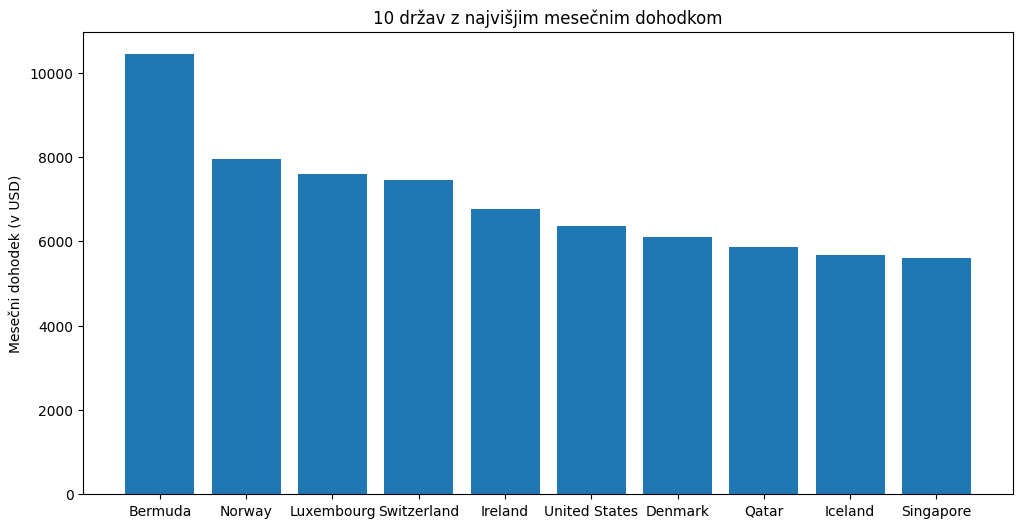

In [13]:
# poglejmo 10 držav, ki imajo na prebivalca največji mesečni dohodek
# spodnja funkcija izlušči 10 držav razvrščenih po mesečnih dohodkih od 
# najvišjega navzdol in izriše graf

def izlusci_narisi_graf(csv_datoteka):
    top_10_drzav = csv_datoteka.sort_values(by='Mesecni dohodek', ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_drzav['Drzava'], top_10_drzav['Mesecni dohodek'])
    plt.ylabel('Mesečni dohodek (v USD)')
    plt.title('10 držav z najvišjim mesečnim dohodkom')
    plt.show()

izlusci_narisi_graf(podatki_csv)


Najvišji dohodek ima Bermuda, ki pa ni samostojna država, ampak otoško ozemlje Združenega kraljestva s samoupravo. Poleg tega ima s 157.9 tudi najvišjega izmed indeksov stroškov, njen indeks kupne moči pa je s 103.8 tudi visoko nad povprečjem (42.4). Bermuda velja za eno izmed najbolj priljubljenih davčnih oaz na svetu, od koder dobi večino svojega bogastva.

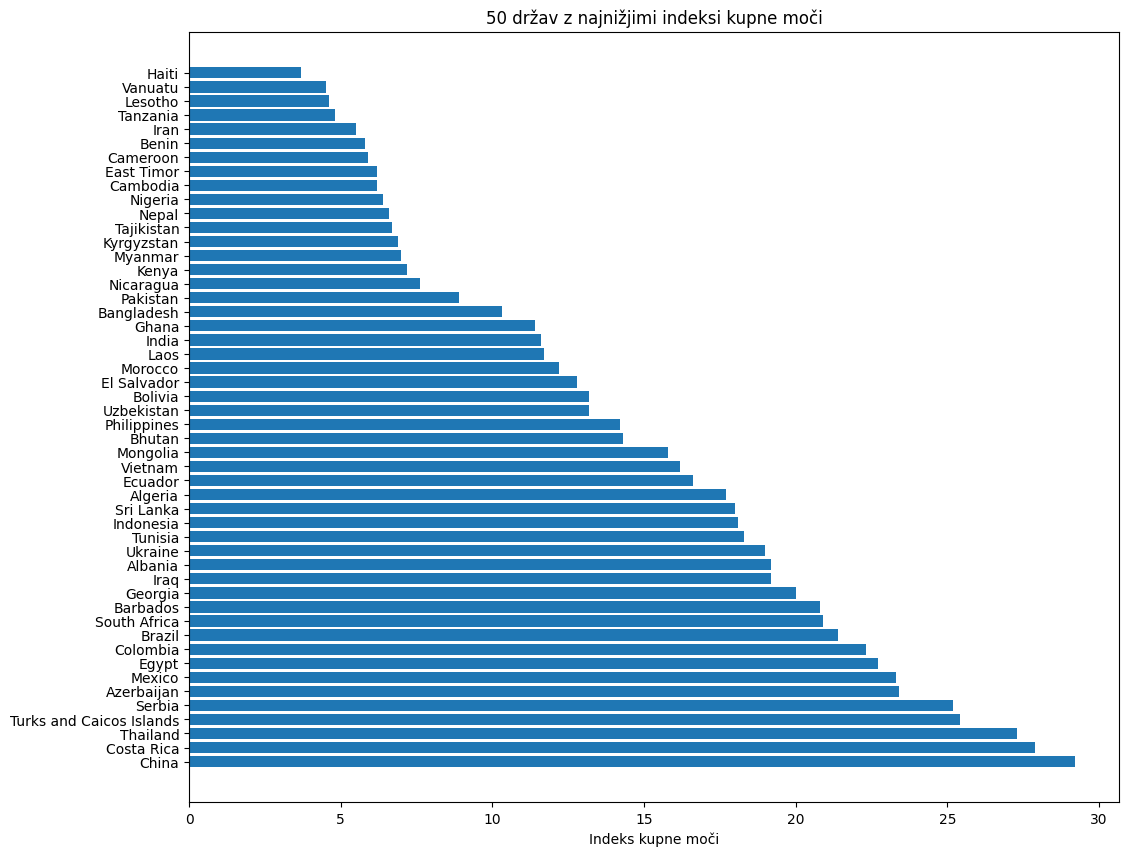

In [14]:
# poglejmno zdaj 50 držav z najnižjimi indeksi kupne moči
def najnizji_indeksi_kupne_moci(csv_datoteka):
    najnizjih_50 = csv_datoteka.sort_values(by='Indeks kupne moci').head(50)
    # izris grafa
    plt.figure(figsize=(12, 10))
    plt.barh(najnizjih_50['Drzava'], najnizjih_50['Indeks kupne moci'])
    plt.xlabel('Indeks kupne moči')
    plt.title('50 držav z najnižjimi indeksi kupne moči')
    plt.gca().invert_yaxis()
    plt.show()

najnizji_indeksi_kupne_moci(podatki_csv)

Najnižjo kupno moč imajo Haiti. Bivša Francoska kolonija ob političnih nestabilnostih, korupciji in številnih naravnih katastrofah velja za eno najrevnejših držav sveta.

Poglejmo še kakšenn je indeks stroškov v odvisnosti od mesečnega dohodka. Hipoteza je, da se bo z večanjem mesečnega dohodka, večal tudi indeks stroškov.

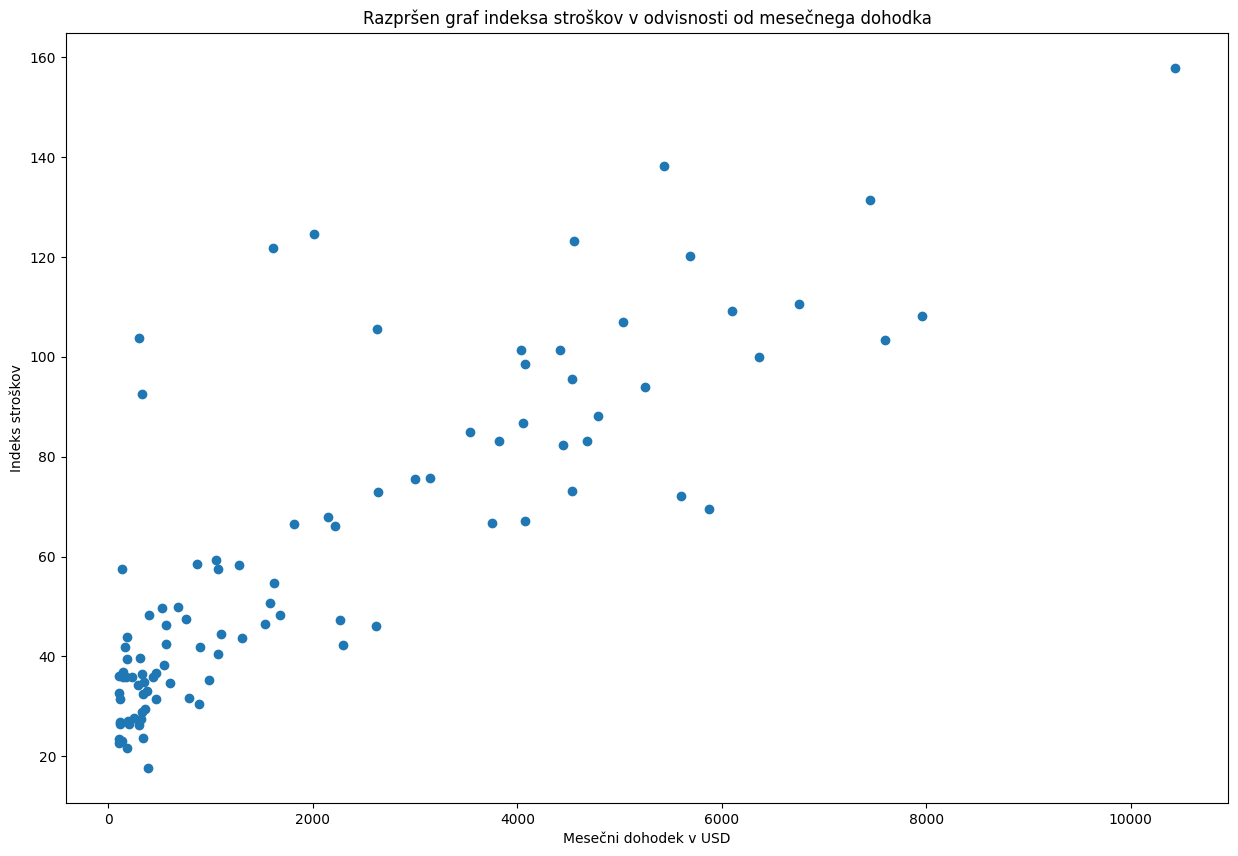

In [24]:
# funkcija vrne razpršen graf indeksa stroškov v odvisnosti od mesečnega dohodka

def narisi_razprsen_graf(csv_datoteka):
    plt.figure(figsize=(15, 10))
    plt.scatter(csv_datoteka['Mesecni dohodek'], csv_datoteka['Indeks stroskov'])
    plt.xlabel('Mesečni dohodek v USD')
    plt.ylabel('Indeks stroškov')
    plt.title('Razpršen graf indeksa stroškov v odvisnosti od mesečnega dohodka')
    plt.show()

narisi_razprsen_graf(podatki_csv)

Kot lahko vidimo se iundeks stroškov in mesečni dohodek večata premosorazmerno. Kar je tudi smiselno, saj v razvitejših državah ljudje z višjim dohodkom imajo na razpolago več denarja, zato ga želijo več tudi zapraviti in tako povečano povpraševanje po dobrinah in storitvah privede do dviga cen le-teh. Zato je indeksd stroškov načeloma višji v državah z višjimi dohodki, saj ljudje tam porabijo več za podobne izdelke in storitve.